# AX-12A Quadruped

created: Kevin Walchko

date: 25 Feb 2018

-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

---

<img src="quad-4-links.png" width="400px">

- Croxa: red
- Femur: blue
- Tibia: yellow
- Tarsus: green

In [72]:
%matplotlib inline

from __future__ import print_function
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt

## Forward Kinematics

The modified DH parameters are:

| i |$a_i$        | $\alpha_i$   | $d_i$   | $theta_i$  |
|---|-------------|--------------|---------|------------|
| 1 | 0           | 0            | 0       | $\theta_1$ |
| 2 | $L_1$       | 90           | 0       | $\theta_2$ |
| 3 | $L_2$       | 0            | 0       | $\theta_3$ |
| 4 | $L_3$       | 0            | 0       | $\theta_4$ |
| 5 | $L_4$       | 0            | 0       |          0 |

- $a_i$: **link length** in mm from $Z_{i-1}$ to $Z_i$ along $X_i$
- $\alpha_i$: **twist angle** between $Z_{i-1}$ and $Z_i$ measured about $X_i$
- $d_i$: **offset distance** between $X_{i-1}$ and $X_i$ along $Z_i$
- $\theta_i$: **rotation angle** between $X_{i-1}$ and $X_i$ measured about $Z_i$

In [149]:
from sympy import symbols, sin, cos, pi, simplify

def makeT(a, alpha, d, theta):
    # create a modified DH homogenious matrix
    return np.array([
        [           cos(theta),           -sin(theta),           0,             a],
        [sin(theta)*cos(alpha), cos(theta)*cos(alpha), -sin(alpha), -d*sin(alpha)],
        [sin(theta)*sin(alpha), cos(theta)*sin(alpha),  cos(alpha),  d*cos(alpha)],
        [                    0,                     0,           0,             1]
    ])

def simplifyT(tt):
    """
    This goes through each element of a matrix and tries to simplify it.
    """
    ret = []
    for row in tt:
        m = []
        for col in row:
            m.append(simplify(col))
        ret.append(m[:])
    return np.array(ret)

def subs(tt, m):
    """
    This allows you to simplify the trigonomic mess that kinematics can
    create and also substitute in some inputs in the process
    
    Yes, this is basically the same as above. I could combine these into 1
    function, but I wanted to beclearer on what I am doing.
    """
    ret = tt.copy()
    for i, row in enumerate(tt):
        for j, col in enumerate(row):
            try:
                ret[i,j] = col.subs(m)
            except:
                ret[i,j] = simplify(col)
    return ret

In [150]:
t1, t2, t3, t4 = symbols('t1 t2 t3 t4')
l1, l2, l3, l4 = symbols('l1 l2 l3 l4')

In [151]:
# a, alpha, d, theta
T1 = makeT(0, 0, 0, t1)
T2 = makeT(l1, pi/2, 0, t2)
T3 = makeT(l2, 0, 0, t3)
T4 = makeT(l3, 0, 0, t4)
T5 = makeT(l4, 0, 0, 0)

In [152]:
print('T1 = ', T1)
print('T2 = ', T2)
print('T3 = ', T3)
print('T4 = ', T4)
print('T5 = ', T5)

T1 =  [[cos(t1) -sin(t1) 0 0]
 [sin(t1) cos(t1) 0 0]
 [0 0 1 0]
 [0 0 0 1]]
T2 =  [[cos(t2) -sin(t2) 0 l1]
 [0 0 -1 0]
 [sin(t2) cos(t2) 0 0]
 [0 0 0 1]]
T3 =  [[cos(t3) -sin(t3) 0 l2]
 [sin(t3) cos(t3) 0 0]
 [0 0 1 0]
 [0 0 0 1]]
T4 =  [[cos(t4) -sin(t4) 0 l3]
 [sin(t4) cos(t4) 0 0]
 [0 0 1 0]
 [0 0 0 1]]
T5 =  [[1 0 0 l4]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [153]:
T = T1.dot(T2.dot(T3.dot(T4.dot(T5))))
print('T = ', T)

T =  [[((-sin(t3)*sin(t4) + cos(t3)*cos(t4))*cos(t2) - (sin(t3)*cos(t4) + sin(t4)*cos(t3))*sin(t2))*cos(t1)
  (-(-sin(t3)*sin(t4) + cos(t3)*cos(t4))*sin(t2) + (-sin(t3)*cos(t4) - sin(t4)*cos(t3))*cos(t2))*cos(t1)
  sin(t1)
  (l1 - (l4*sin(t4)*cos(t3) + (l3 + l4*cos(t4))*sin(t3))*sin(t2) + (l2 - l4*sin(t3)*sin(t4) + (l3 + l4*cos(t4))*cos(t3))*cos(t2))*cos(t1)]
 [((-sin(t3)*sin(t4) + cos(t3)*cos(t4))*cos(t2) - (sin(t3)*cos(t4) + sin(t4)*cos(t3))*sin(t2))*sin(t1)
  (-(-sin(t3)*sin(t4) + cos(t3)*cos(t4))*sin(t2) + (-sin(t3)*cos(t4) - sin(t4)*cos(t3))*cos(t2))*sin(t1)
  -cos(t1)
  (l1 - (l4*sin(t4)*cos(t3) + (l3 + l4*cos(t4))*sin(t3))*sin(t2) + (l2 - l4*sin(t3)*sin(t4) + (l3 + l4*cos(t4))*cos(t3))*cos(t2))*sin(t1)]
 [(-sin(t3)*sin(t4) + cos(t3)*cos(t4))*sin(t2) + (sin(t3)*cos(t4) + sin(t4)*cos(t3))*cos(t2)
  (-sin(t3)*sin(t4) + cos(t3)*cos(t4))*cos(t2) + (-sin(t3)*cos(t4) - sin(t4)*cos(t3))*sin(t2)
  0
  (l4*sin(t4)*cos(t3) + (l3 + l4*cos(t4))*sin(t3))*cos(t2) + (l2 - l4*sin(t3)*sin(t4) + (

In [154]:
Tf = simplify(T)

In [155]:
print(Tf)

[[cos(t1)*cos(t2 + t3 + t4), -sin(t2 + t3 + t4)*cos(t1), sin(t1), (l1 + l2*cos(t2) + l3*cos(t2 + t3) + l4*cos(t2 + t3 + t4))*cos(t1)], [sin(t1)*cos(t2 + t3 + t4), -sin(t1)*sin(t2 + t3 + t4), -cos(t1), (l1 + l2*cos(t2) + l3*cos(t2 + t3) + l4*cos(t2 + t3 + t4))*sin(t1)], [sin(t2 + t3 + t4), cos(t2 + t3 + t4), 0, l2*sin(t2) + l3*sin(t2 + t3) + l4*sin(t2 + t3 + t4)], [0, 0, 0, 1]]


In [156]:
print('position x: {}'.format(Tf[0,3]))
print('position y: {}'.format(Tf[1,3]))
print('position z: {}'.format(Tf[2,3]))

position x: (l1 + l2*cos(t2) + l3*cos(t2 + t3) + l4*cos(t2 + t3 + t4))*cos(t1)
position y: (l1 + l2*cos(t2) + l3*cos(t2 + t3) + l4*cos(t2 + t3 + t4))*sin(t1)
position z: l2*sin(t2) + l3*sin(t2 + t3) + l4*sin(t2 + t3 + t4)


In [157]:
from math import cos, sin, pi, atan2, sqrt, acos
def forward(t1,t2,t3,t4, degrees=True):
    l1 = 28
    l2 = 90
    l3 = 84
    l4 = 98
    
    if degrees:
        t1 *= pi/180
        t2 *= pi/180
        t3 *= pi/180
        t4 *= pi/180
        
    x = (l1 + l2*cos(t2) + l3*cos(t2 + t3) + l4*cos(t2 + t3 + t4))*cos(t1)
    y = (l1 + l2*cos(t2) + l3*cos(t2 + t3) + l4*cos(t2 + t3 + t4))*sin(t1)
    z = l2*sin(t2) + l3*sin(t2 + t3) + l4*sin(t2 + t3 + t4)
    return (x,y,z)

## Inverse Kinematics

![](http://mathworld.wolfram.com/images/eps-gif/LawofCosines_1000.gif)

## Law of Cosines

$$
a^2 = b^2 + c^2 - 2bc \cos(A) \rightarrow \cos(A)=\frac{-a^2+b^2+c^2}{2bc}\\
b^2 = a^2 + c^2 - 2ac \cos(B) \rightarrow \cos(B)=\frac{a^2-b^2+c^2}{2ac}\\
c^2 = a^2 + b^2 - 2ab \cos(C) \rightarrow \cos(C)=\frac{a^2+b^2-c^2}{2ab}
$$

- [Wolfram: law of cosines](http://mathworld.wolfram.com/LawofCosines.html)

## Law of Sines

$$
\frac{a}{\sin(A)} = \frac{b}{\sin(B)} = \frac{c}{\sin(C)}
$$

In [158]:
def cosinelaw(a,b,c):
    # cos(g) = (a^2+b^2-c^2)/2ab
    return acos((a**2+b**2-c**2)/(2*a*b))

def inverse(x,y,z,o, degrees=True):
    """
    Azimuth angle is between x and w and lies in the x-y plane
    
               ^ x
         w     |
           \   |
         l1 \  |
             \ |
              \|
    <----------+ (z is out of the page - right hand rule)
    y
    
    Most of the robot arm move in the plane defined by w-z
    
    ^ z      l3
    |      o-----o
    |     /       \ l4
    |    / l2      E
    |   /
    +--o-------------> w
     l1
     
    l1: coxa
    l2: femur
    l3: tibia
    l4: tarsus
     
    All joint angles returned are in degrees: (t1, t2, t3, t4)
    """
    l1 = 28
    l2 = 90
    l3 = 84
    l4 = 98
    t1 = atan2(y,x)
    
    if degrees:
        o = o*pi/180
    
    w = sqrt(x**2+y**2)-l1
    j4w = w+l4*cos(o)
    j4z = z+l4*sin(o)
    r = sqrt(j4w**2+j4z**2)
    g1 = atan2(j4z,j4w)
    g2 = cosinelaw(l2,r,l3)
    t2 = g1+g2
    
    t3 = pi+cosinelaw(l2,l3,r)
    
    j2w=l2*cos(t2)
    j2z=l2*sin(t2)
    c=sqrt((w-j2w)**2+(z-j2z)**2)
    t4=pi+cosinelaw(l3,l4,c)
    
    if degrees:
        t1 *= 180/pi
        t2 *= 180/pi
        t3 *= 180/pi
        t4 *= 180/pi
    
    return (t1,t2,t3,t4)

# Test

Let's test that both the forward and inverse kinematics agree ... and they should. The errors are printed below. Please note, that 0 and 360 degrees are the same thing. 

In [159]:
def testAng(a1,a2,a3,a4):
    # all angles in degrees
    
    print('*'*25)
    
    f=forward(a1,a2,a3,a4)
    print('Pts FK:', f)
    
    f = f + (180+(a2+a3+a4),)
    print('debug', f)
    i=inverse(*f)
    print('Angles IK [deg]:', i)
    
    print('Delta Angles:')
    err = []
    for a,b in zip([a1,a2,a3,a4],i):
        err.append(a-b)
        
    print('  a1:{:.2f} a2:{:.2f} a3:{:.2f} a4:{:.2f}'.format(err[0],err[1],err[2], err[3]))

def testPos(x,y,z,o):
    # a,y,z in mm
    # o in deg measured from the floor, so if the leg is straight down, then o = 90 deg
    
    print('*'*25)
    
    i=inverse(x,y,z,o)
    print('Angles IK [deg]:', i)
    
    f=forward(*i)
    print('Pts FK:', f)
    
    print('Delta Angles:')
    err = []
    for a,b in zip([x,y,z],f):
        err.append(a-b)
        
    print('  x:{:.2f} y:{:.2f} z:{:.2f}'.format(err[0],err[1],err[2]))

In [160]:
testPos(150,0,-20,90)
testPos(300,0,0,180)
testPos(50,0,-90,90)

*************************
Angles IK [deg]: (0.0, 64.97233762272079, 292.60597117064793, 272.4216912066313)
Pts FK: (150.00000000000014, 0.0, -20.000000000000057)
Delta Angles:
  x:-0.00 y:0.00 z:0.00
*************************
Angles IK [deg]: (0.0, 3.951939719864471e-15, 360.0, 360.0)
Pts FK: (300.0, 0.0, -6.237252835657382e-14)
Delta Angles:
  x:0.00 y:0.00 z:0.00
*************************
Angles IK [deg]: (0.0, 87.78464399085003, 194.9530545437927, 347.26230146535727)
Pts FK: (49.999999999999936, 0.0, -90.0)
Delta Angles:
  x:0.00 y:0.00 z:0.00


In [161]:
testAng(0,0,0,0)
testAng(0,45,-45,-90)
testAng(0,0,-90,0)

*************************
Pts FK: (300.0, 0.0, 0.0)
debug (300.0, 0.0, 0.0, 180)
Angles IK [deg]: (0.0, 3.951939719864471e-15, 360.0, 360.0)
Delta Angles:
  a1:0.00 a2:-0.00 a3:-360.00 a4:-360.00
*************************
Pts FK: (175.63961030678928, 0.0, -34.36038969321073)
debug (175.63961030678928, 0.0, -34.36038969321073, 90)
Angles IK [deg]: (0.0, 44.999999999999986, 315.0, 270.0)
Delta Angles:
  a1:0.00 a2:0.00 a3:-360.00 a4:-360.00
*************************
Pts FK: (118.0, 0.0, -182.0)
debug (118.0, 0.0, -182.0, 90)
Angles IK [deg]: (0.0, 0.0, 270.0, 360.0)
Delta Angles:
  a1:0.00 a2:0.00 a3:-360.00 a4:-360.00


# Plot Leg Locations

Let's get a visual of what is going on when we command a leg to a 3d location. The command is:

```python
plotLeg(x,y,z,orientation)
```

The *orientation* is the tarsus (foot) angle between the ground plane and the tarsus. Thus, if the tarsus is pointing straight down, the angle is 90 degrees. This is measured from the floor to the tarsus link.

In [162]:
def rplot(t1, t2, t3, t4, degrees=True):
    """Given the 4 joint angles (in rads), plot the arm in the x-y and w-z planes
    
    x = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*cos(t1)
    y = (d2 + l1*cos(t2) + l2*cos(t2 + t3) + l3*cos(t2 + t3 + t4))*sin(t1)
    z = l1*sin(t2) + l2*sin(t2 + t3) + l3*sin(t2 + t3 + t4)
    """
    l1 = 28
    l2 = 90
    l3 = 84
    l4 = 98

    ptsx = [0]
    ptsy = [0]
    
    if degrees:
        t1 *= pi/180
        t2 *= pi/180
        t3 *= pi/180
        t4 *= pi/180
    
    
    # our definition is reverse or these joints
    # link 1
    x0 = l1
    y0 = 0
    ptsx.append(x0)
    ptsy.append(y0)
    
    # link 2
    x1 = x0 + l2*cos(t2)
    y1 = y0 + l2*sin(t2)
    ptsx.append(x1)
    ptsy.append(y1)
    
    # link 3
    x2 = x1 + l3*cos(t2 + t3)
    y2 = y1 + l3*sin(t2 + t3)
    ptsx.append(x2)
    ptsy.append(y2)
    
    # link 4
    x3 = x2 + l4*cos(t2 + t3 + t4)
    y3 = y2 + l4*sin(t2 + t3 + t4)
    ptsx.append(x3)
    ptsy.append(y3)
    
    plt.subplot(1,2,1,projection='polar')
    plt.plot([0, t1], [0, 1.0])
    plt.grid(True)
    plt.title('Azimuth Angle (x-y plane)')
    
    plt.subplot(1,2,2)
    plt.plot(ptsx, ptsy, 'b-', marker='o')
    plt.axis('equal')
    plt.grid(True)
    plt.title('w-z Plane')    

def plotLeg(x, y, z, orient):
    """Given a point (in inches) and orientation (in rads), this calculates
    the joint angles, then uses those angles to calculate the forward solution
    and prints out the error. It also plots the arm.
    """
    angles = inverse(x, y, z, orient)
    
    angles = list(angles)
    
    for i, a in enumerate(angles):
        if a > 180:
            angles[i] = -360 + a
        
    a,b,c,d = angles
    print('Angles: {:.2f} {:.2f} {:.2f} {:.2f}'.format(a,b,c,d))
    
    print('w-z plane (w,z): {:.2f} {:.2f}'.format(sqrt(x**2 + y**2), z))

    rplot(*angles)

Angles: 45.00 26.33 -103.52 -12.80
w-z plane (w,z): 127.28 -140.00


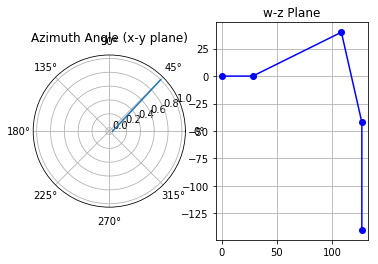

In [163]:
plotLeg(90,90,-140,90)

Angles: -45.00 59.38 -72.76 -76.61
w-z plane (w,z): 155.56 -40.00


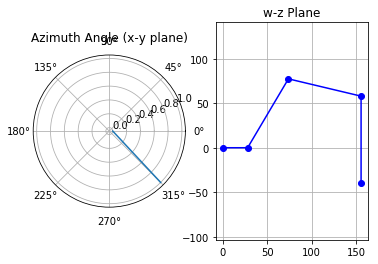

In [164]:
plotLeg(110,-110,-40,90)

Angles: 0.00 75.60 -120.39 -45.22
w-z plane (w,z): 110.00 -70.00


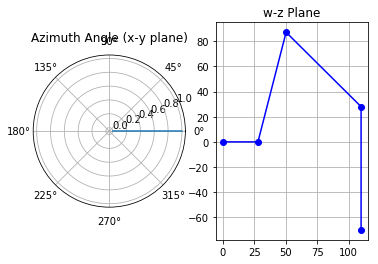

In [165]:
plotLeg(110,0,-70,90)

Angles: 45.00 52.03 -82.78 -59.25
w-z plane (w,z): 155.56 -70.00


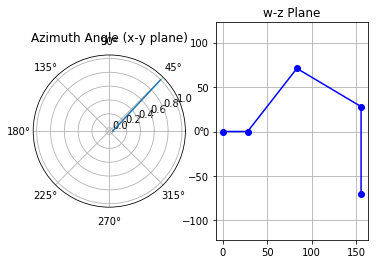

In [166]:
plotLeg(110,110,-70,90)

# Torque

$ \sum T_{AX-12A} = T_{CM} $

For this version, we have 3x AX-12A's holding up the robot. The coxia servo only swings side-to-side, so it doesn't help support the weight.

$ T_{CM} = weight / 4 * foot_{location}$

**Now**, Robotis suggests the max weight should only be 1/5 for sustainable dynamic movement. So we will divide by another 5 to get that number.

In [14]:
def N2lbf(x):
    return x*0.224809

tax12 = 1.5 # Nm
foot = 0.155 # m
w = 3*tax12*4/foot/5
print('Max robot weight: {:.2f} N'.format(w))
print('Max weight: {:.2f} lbf'.format(N2lbf(w)))

Max robot weight: 23.23 N
Max weight: 5.22 lbf


In [15]:
gax12 = 0.0546 # kg
motors = 16*gax12
print('Motors: {:.2f} N'.format(motors))
print('Motors: {:.2f} lbf'.format(N2lbf(motors)))

Motors: 0.87 N
Motors: 0.20 lbf


In [16]:
rw = w - motors
print('Remaining weight: {:.2f} N'.format(rw))
print('Remaining weight: {:.2f} lbf'.format(N2lbf(rw)))

Remaining weight: 22.35 N
Remaining weight: 5.02 lbf
